# Data Exploration - 5

Se realiza un analisis exploratorio de los eventos ocurridos en la ventana de tiempo de entre el **22-04-2018** y el **29-04-2018**:
- Streaming crudo de twitter se estuvo recolectando durante la ventanda de tiempo.
- Se intentará entender el fenomeno en función exclusiva de las menciones.

## Éxito de los distintos shows: Datos "duros" 

www.pollstar.com contiene información de la venta de tickets de una gran cantidad de eventos a nivel mundial.

Mediante _web scraping_ se rescata la última información liberada por las tickeras.

### Carga de datos de venta de tickets

In [297]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [298]:
filename = "/home/bberrios/experimento-1/filtrar/live_boxoffice-all-2.txt"
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')
events = pd.read_csv(filename, sep='\t', parse_dates=['StartPlayDate'], date_parser=dateparse)

In [299]:
events.head()

,StartPlayDate,sortName,eventName,venue,cityStateCountry,numTicketSold,capacity,capacityPercentage,ticketPriceFrom,ticketriceTo,grossUSD,currency,grossGate,numShows
0,2018-05-05,KENNY CHESNEY,Kenny Chesney,U.S. Bank Stadium,"Minneapolis, MN",48255,48255,100,29.00,260.00,4999184,US DOLLAR,4999184,1
1,2018-05-04,FOO FIGHTERS,Foo Fighters,Bridgestone Arena,"Nashville, TN",13537,13537,100,49.00,99.00,1264443,US DOLLAR,1264443,1
2,2018-05-02,SPRINGSTEEN ON BROADWAY,Springsteen On Broadway / Bruce Springsteen,Walter Kerr Theatre,"New York, NY",3792,948,100,75.00,850.00,1928605,US DOLLAR,1928605,4
3,2018-05-01,DON BROCO,Don Broco,Keele University,"Keele, United Kingdom",797,1100,73,25.00,28.00,27432,UK Pounds,19937,1
4,2018-05-01,DARYL HALL JOHN OATES,Daryl Hall & John Oates / Train,Golden 1 Center,"Sacramento, CA",8840,10259,87,45.97,125.97,650141,US DOLLAR,650141,1


#### Estadisticos básicos

In [300]:
mean = events["capacityPercentage"].mean()
std = events["capacityPercentage"].std()
median = events["capacityPercentage"].median()

print "mean:", mean
print "standar deviation:", std
print "median:", median

mean: 78.58924395947
standar deviation: 24.976889498447385
median: 89.0


### Eventos entre 22-04-2018 y 29-04-2018

In [399]:
events_window = pd.DataFrame(events[ (events.StartPlayDate >= '2018-04-22') &
                      (events.StartPlayDate <= '2018-04-29')])
events_window

,StartPlayDate,sortName,eventName,venue,cityStateCountry,numTicketSold,capacity,capacityPercentage,ticketPriceFrom,ticketriceTo,grossUSD,currency,grossGate,numShows,artista
6,2018-04-29,DON BROCO,Don Broco,Engine Shed,"Lincoln, United Kingdom",1181,1800,66,25.00,28.00,41435,UK Pounds,29579,1,don broco
7,2018-04-29,VANCE JOY,Vance Joy,The Criterion,"Oklahoma City, OK",2542,2542,100,42.50,0.00,82367,US DOLLAR,82367,1,vance joy
8,2018-04-29,POST MALONE,Post Malone,Accesso ShoWare Center,"Kent, WA",6648,6713,100,59.50,248.00,603282,US DOLLAR,603282,1,post malone
9,2018-04-28,BROKEN ARROW THE MUSIC OF NEIL YOUNG,Broken Arrow - The Music of Neil Young,Suffolk Theater,"Riverhead, NY",367,435,85,39.00,42.00,14673,US DOLLAR,14673,1,broken arrow the music of neil young
10,2018-04-28,CLASSIC ALBUMS LIVE,Classic Albums Live,Ordway Center For The Perf. Arts,"Saint Paul, MN",886,967,92,19.00,39.00,31660,US DOLLAR,31660,1,classic albums live
11,2018-04-28,DON BROCO,Don Broco,O2 Academy Liverpool,"Liverpool, United Kingdom",1200,1200,100,25.00,30.00,42025,UK Pounds,30000,1,don broco
12,2018-04-28,VANCE JOY,Vance Joy,Brady Theater,"Tulsa, OK",2484,2484,100,38.50,45.00,91697,US DOLLAR,91697,1,vance joy
13,2018-04-28,MALUMA,Maluma,State Farm Arena,"Hidalgo, TX",5046,5046,100,59.50,169.50,695207,US DOLLAR,695207,1,maluma
14,2018-04-28,ERIC CHURCH,Eric Church,Austin360 Amphitheater,"Austin, TX",12671,12671,100,27.50,129.00,780854,US DOLLAR,780854,1,eric church
15,2018-04-28,KILLERS,The Killers,Qudos Bank Arena,"Sydney, Australia",14738,15097,98,89.00,149.00,1253455,Australian,1632570,1,killers


#### Eventos exitosos > 80%

In [400]:
fields_to_show = ['StartPlayDate', 'sortName', 'capacityPercentage', 'venue', 'cityStateCountry', 'currency']

In [401]:
success_threadhold = 80
success_shows = events_window[(events_window.capacityPercentage > success_threadhold)]

print "Cantidad:", len(success_shows)
success_shows[fields_to_show]

Cantidad: 39


,StartPlayDate,sortName,capacityPercentage,venue,cityStateCountry,currency
7,2018-04-29,VANCE JOY,100,The Criterion,"Oklahoma City, OK",US DOLLAR
8,2018-04-29,POST MALONE,100,Accesso ShoWare Center,"Kent, WA",US DOLLAR
9,2018-04-28,BROKEN ARROW THE MUSIC OF NEIL YOUNG,85,Suffolk Theater,"Riverhead, NY",US DOLLAR
10,2018-04-28,CLASSIC ALBUMS LIVE,92,Ordway Center For The Perf. Arts,"Saint Paul, MN",US DOLLAR
11,2018-04-28,DON BROCO,100,O2 Academy Liverpool,"Liverpool, United Kingdom",UK Pounds
12,2018-04-28,VANCE JOY,100,Brady Theater,"Tulsa, OK",US DOLLAR
13,2018-04-28,MALUMA,100,State Farm Arena,"Hidalgo, TX",US DOLLAR
14,2018-04-28,ERIC CHURCH,100,Austin360 Amphitheater,"Austin, TX",US DOLLAR
15,2018-04-28,KILLERS,98,Qudos Bank Arena,"Sydney, Australia",Australian
16,2018-04-28,KENNY CHESNEY,100,Miller Park,"Milwaukee, WI",US DOLLAR


#### Eventos no exitosos <= 60%

In [402]:
failure_threadhold = 60
failure_shows = events_window[events_window.capacityPercentage <= failure_threadhold]
print "Cantidad:", len(failure_shows)
failure_shows[fields_to_show]

Cantidad: 9


,StartPlayDate,sortName,capacityPercentage,venue,cityStateCountry,currency
19,2018-04-27,ALMIR SATER,51,Citibank Hall,"Sao Paulo, Brazil",Reals
28,2018-04-26,QUINTA DO SAMBA,1,Citibank Hall,"Sao Paulo, Brazil",Reals
34,2018-04-24,Anderson John,58,Grand Theater,"Wausau, WI",US DOLLAR
38,2018-04-23,MANIC STREET PREACHERS,50,Metro Radio Arena,"Newcastle upon Tyne, United Kingdom",UK Pounds
41,2018-04-23,WAXAHATCHEE,41,First Avenue,"Minneapolis, MN",US DOLLAR
43,2018-04-23,OF MICE MEN,46,O2 Ritz Manchester,"Manchester, United Kingdom",UK Pounds
46,2018-04-22,MOONCHILD,50,Harlow's Night Club,"Sacramento, CA",US DOLLAR
48,2018-04-22,Mehldau Brad,59,Swyer Theatre,"Albany, NY",US DOLLAR
50,2018-04-22,WEIRD AL YANKOVIC,57,Wagner No�l Performing Arts Center,"Midland, TX",US DOLLAR


In [403]:
print set(failure_shows['sortName'])

set(['MOONCHILD', 'Mehldau Brad', 'QUINTA DO SAMBA', 'ALMIR SATER', 'Anderson John', 'WEIRD AL YANKOVIC', 'OF MICE  MEN', 'MANIC STREET PREACHERS', 'WAXAHATCHEE'])


## Análisis

Mediante técnica de map-reduce se accesa a los tweets en crudo recolectados en la ventana de tiempo indicada.

El proceso tiene como objetivo contar cada mención del artista por día.

### Ejecutar map-reduce

**$** hadoop jar /opt/cloudera/parcels/CDH/jars/hadoop-streaming-2.6.0-cdh5.14.2.jar -files mapper.py,reducer.py,shows.txt -mapper "python mapper.py 22/4 29/4" -reducer reducer.py -input /user/bberrios/twitter/raw-streaming/tweets_2018_04_2* -output /user/bberrios/outputs/raw-2

### Descargar a sistema de archivos local

**$** hadoop fs -get * /user/bberrios/outputs/raw-2

Leyendo los archivos "part" por el conteo de menciones con map-reduce:

In [404]:
files = "/home/bberrios/experimento-1/outputs/raw-2/part*"
part_df = pd.concat([pd.read_csv(f,  sep='\t', header = None) for f in glob.glob(files)], ignore_index = True)

part_df['dia'], part_df['mes'], part_df['artista'] = zip(*part_df[0].apply(lambda x: x.split(' ', 2)))
part_df['menciones'] = df[1]
part_df['dia'] = part_df['dia'].astype(int)
part_df['mes'] = part_df['mes'].astype(int)

### Artistias más populares (menciones)

Menciones en orden descendentes:

In [405]:
sorted_part_df = part_df.sort_values(['dia', 'mes', 'menciones'], ascending = [False, False, False])
sorted_part_df[['dia', 'mes', 'artista', 'menciones']][:10]

,dia,mes,artista,menciones
59,29,4,post malone,1168
14,29,4,harry styles,381
132,29,4,halsey,178
100,29,4,killers,159
87,29,4,maluma,156
146,29,4,bad bunny,130
15,29,4,pitbull,113
177,29,4,moonchild,59
74,29,4,foo fighters,20
44,29,4,george ezra,4


Máxima cantidad de menciones en la ventana de tiempo por día:

In [406]:
max_mentions = part_df.sort_values(['menciones'], ascending = False)
max_mentions[['dia', 'mes', 'artista', 'menciones']][:20]

,dia,mes,artista,menciones
116,28,4,post malone,2766
71,27,4,post malone,2175
82,26,4,harry styles,1170
59,29,4,post malone,1168
57,27,4,halsey,886
86,28,4,halsey,541
21,25,4,harry styles,515
155,26,4,halsey,480
143,26,4,post malone,463
129,27,4,harry styles,439


Máxima cantidad de menciones en ventada de tiempo por artista.

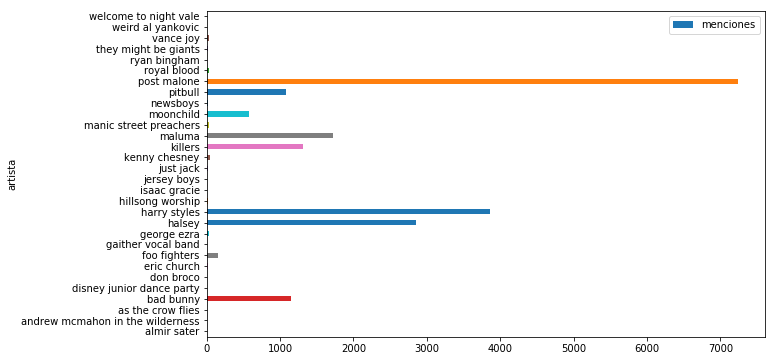

In [459]:
grouping = part_df[['artista', 'menciones']]
grouping = grouping.groupby(['artista'], as_index = False)['menciones'].sum()
grouping.plot.barh(x = 'artista', y = 'menciones')

### Venta de tickes + menciones en twitter

Preparación de la data para mezclar información que proviene de la venta de tickets con la información de menciones obtenidas con el map-reduces a los twitters dentro de la ventana de tiempo.

In [467]:
#Se prepara el conjunto de datos para que el campo de fecha tenga el tipo de dato correcto
#de forma de poder realizar el "join"
def to_date_format(x):
    date = '-'.join(str(num) for num in x)
    date = '2018-' + date
    return date
    
part_df['date'] = part_df[['mes', 'dia']].apply(to_date_format, axis=1)
part_df['date'] = pd.to_datetime(part_df['date'])

#en minuscula 
events_window["artista"] = events_window['sortName'].str.lower()
events_window.head()

,StartPlayDate,sortName,eventName,venue,cityStateCountry,numTicketSold,capacity,capacityPercentage,ticketPriceFrom,ticketriceTo,grossUSD,currency,grossGate,numShows,artista
6,2018-04-29,DON BROCO,Don Broco,Engine Shed,"Lincoln, United Kingdom",1181,1800,66,25.0,28.0,41435,UK Pounds,29579,1,don broco
7,2018-04-29,VANCE JOY,Vance Joy,The Criterion,"Oklahoma City, OK",2542,2542,100,42.5,0.0,82367,US DOLLAR,82367,1,vance joy
8,2018-04-29,POST MALONE,Post Malone,Accesso ShoWare Center,"Kent, WA",6648,6713,100,59.5,248.0,603282,US DOLLAR,603282,1,post malone
9,2018-04-28,BROKEN ARROW THE MUSIC OF NEIL YOUNG,Broken Arrow - The Music of Neil Young,Suffolk Theater,"Riverhead, NY",367,435,85,39.0,42.0,14673,US DOLLAR,14673,1,broken arrow the music of neil young
10,2018-04-28,CLASSIC ALBUMS LIVE,Classic Albums Live,Ordway Center For The Perf. Arts,"Saint Paul, MN",886,967,92,19.0,39.0,31660,US DOLLAR,31660,1,classic albums live


#### Mezcla: ticket +  de menciones dia EXACTO del evento
¿Alguna relación entre menciones el día exacto y cantidad de tickets?

In [468]:
filds_to_show = ['StartPlayDate', 'sortName', 'menciones','capacityPercentage', 'numTicketSold', 'capacity', 'venue', 'cityStateCountry', 'currency']

#Se realiza el "join" de los dataframes
joined = events_window.merge(
    part_df, 
    left_on=['StartPlayDate', 'artista'], 
    right_on=['date', 'artista'], 
    how='left', 
    indicator=False)
joined = joined.fillna(0)
joined[filds_to_show].head()



,StartPlayDate,sortName,menciones,capacityPercentage,numTicketSold,capacity,venue,cityStateCountry,currency
0,2018-04-29,DON BROCO,1.0,66,1181,1800,Engine Shed,"Lincoln, United Kingdom",UK Pounds
1,2018-04-29,VANCE JOY,4.0,100,2542,2542,The Criterion,"Oklahoma City, OK",US DOLLAR
2,2018-04-29,POST MALONE,1168.0,100,6648,6713,Accesso ShoWare Center,"Kent, WA",US DOLLAR
3,2018-04-28,BROKEN ARROW THE MUSIC OF NEIL YOUNG,0.0,85,367,435,Suffolk Theater,"Riverhead, NY",US DOLLAR
4,2018-04-28,CLASSIC ALBUMS LIVE,0.0,92,886,967,Ordway Center For The Perf. Arts,"Saint Paul, MN",US DOLLAR


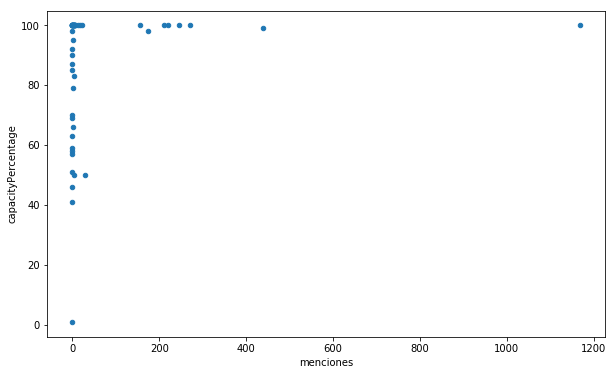

In [469]:
joined.plot(x = 'menciones', y = 'capacityPercentage', kind = 'scatter')

#### Mezcla: ticket +  de menciones TOTALES por artista en ventana de tiempo
¿Alguna relación entre menciones TOTALES y cantidad de tickets?

In [470]:
filds_to_show = ['StartPlayDate', 'sortName', 'menciones','capacityPercentage', 'numTicketSold', 'capacity', 'venue', 'cityStateCountry', 'currency']

#Se realiza el "join" de los dataframes
joined_total_mentions = events_window.merge(
    pd.DataFrame(grouping), 
    left_on=['artista'], 
    right_on=['artista'], 
    how='left', 
    indicator=False)
joined_total_mentions = joined_total_mentions.fillna(0)
joined_total_mentions[filds_to_show].head()

,StartPlayDate,sortName,menciones,capacityPercentage,numTicketSold,capacity,venue,cityStateCountry,currency
0,2018-04-29,DON BROCO,6.0,66,1181,1800,Engine Shed,"Lincoln, United Kingdom",UK Pounds
1,2018-04-29,VANCE JOY,34.0,100,2542,2542,The Criterion,"Oklahoma City, OK",US DOLLAR
2,2018-04-29,POST MALONE,7243.0,100,6648,6713,Accesso ShoWare Center,"Kent, WA",US DOLLAR
3,2018-04-28,BROKEN ARROW THE MUSIC OF NEIL YOUNG,0.0,85,367,435,Suffolk Theater,"Riverhead, NY",US DOLLAR
4,2018-04-28,CLASSIC ALBUMS LIVE,0.0,92,886,967,Ordway Center For The Perf. Arts,"Saint Paul, MN",US DOLLAR


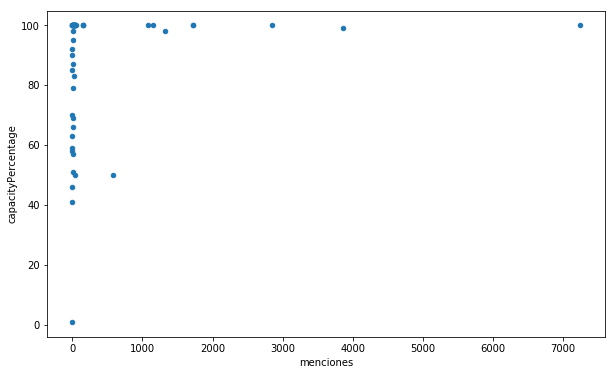

In [471]:
joined_total_mentions.plot(x = 'menciones', y = 'capacityPercentage', kind = 'scatter')

## Conclusión

    En función de la muestra utilizada: A Simple vista no existe correlación entre las variables observadas (menciones y ticket vendidos).